In [4]:
import pickle

with open('mse_exp10.pickle', 'rb') as handle:
    data = pickle.load(handle)

xs, ys, zs, gss, gws = data

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.interpolate import griddata

def contour_plot(intensities):    
    points = np.array([[gs, gw] for gs in gss for gw in gws])
    grid_x, grid_y = np.mgrid[gss[0]:gss[-1]:200j, gws[0]:gws[-1]:200j]
    grid_z = griddata(points, intensities, (grid_x, grid_y), method='cubic')
    plt.rcParams.update({'font.size': 12})
    
    plt.contourf(grid_x, grid_y, grid_z, levels=17, cmap='viridis')
    plt.title('Test error under gradient descent')
    plt.colorbar(label='Error')
    plt.xlabel('$\gamma_{\sigma^2}$')
    plt.ylabel('$\gamma_w$')
    contour_lines = plt.contour(grid_x, grid_y, grid_z, colors='#D3D3D3', levels=[0.25,0.5,0.75], linestyles='solid')
    plt.clabel(contour_lines, inline=True, fontsize=11, colors='white')
    plt.plot(1-np.linspace(1, 4, 2), np.linspace(1, 4, 2),c='#0d0d0d', label='Active vs lazy threshold', alpha=.8)
    plt.plot(-np.linspace(0, 1.5, 2), np.linspace(0, 3, 2),c='#d62728', label='Infinite noise threshold', alpha=.8)
    plt.plot(np.linspace(-3, 0, 3), [.304] * 3, c='#ff8c00', label='Underparameterized threshold', alpha=.8)
    plt.xlim(gss[0], gss[-1])
    plt.ylim(gws[0], gws[-1])
    l = plt.legend(loc='upper left', bbox_to_anchor=(0, 0.4), fontsize=11)
    l.get_frame().set_alpha(0.55)
    plt.savefig('error.png')

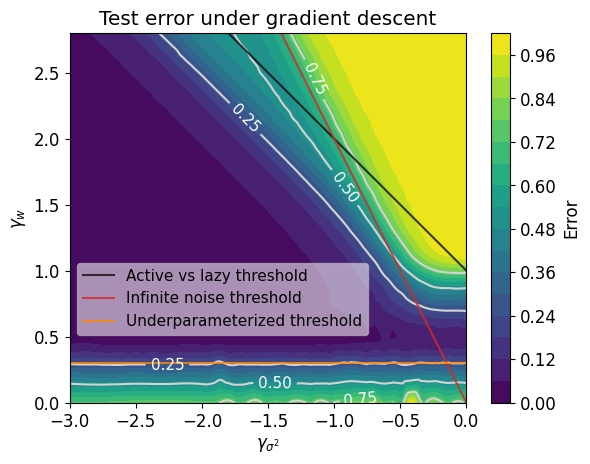

In [32]:
new_zs = [np.min(z[1]) for z in zs]
contour_plot(new_zs)